<h2>1. The distribution of distances between the edited adenines: the real <i>vs.</i> the expected one</h2>
<p>Let us define the <i>S</i> measure as:</p>
$$ S = crd_{i} - crd_{i-1} $$
<p>Where $crd_{i}$ is the position of $i$-th editing site on the considered sequence</p>
<p>First, we compute distributions of distances (measure <i>S</i>) between the real editing sites</p>
<p>Second, we compute the corresponding expected distribution: for each sequence we, preserving numbers of synonimous and non-synonimous editing sites, generate a set of random adenines and compute the <i>S</i> measure</p>
<p>The resulting distributions are then compared</p>
<p>We use the editing site data and transcriptomes generated by Liscovitch-Brauer et al., 2017</p>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
import random
from editing_adlib import *
%matplotlib inline

In [2]:
def build_s_dist(edsite_crd_dict, norm = False, orf_crd_dict = None):
    s_dist = np.array([])
    for seq in edsite_crd_dict.keys():
        crd_arr = sorted(edsite_crd_dict[seq].keys())
        s_arr = []
        l = len(crd_arr)
        for i in range(1, l):
            s = crd_arr[i] - crd_arr[i-1]
            if norm:
                n = l*(orf_crd_dict[seq][1] - orf_crd_dict[seq][0])
                s = float(s)/n
            s_arr.append(s)
        s_dist = np.append(s_dist, s_arr)
    return s_dist
    
def build_random_s_dist(fastadict, edsite_crd_dict, orf_crd_dict, syn_nsyn = None):
    rand_edsite_crd_dict = dict()
    for seq_id in fastadict.keys():
        if not edsite_crd_dict.get(seq_id):
            continue
        rand_edsite_crd_dict[seq_id] = dict()
        orf = fastadict[seq_id][orf_crd_dict[seq_id][0]:orf_crd_dict[seq_id][1]]
        adenine_pos_arr = [i.start() for i in re.finditer("A", orf)]
        pos_num = len(edsite_crd_dict[seq_id].keys())
        pos_arr = random.sample(adenine_pos_arr, pos_num)
        for i in range(pos_num):
            rand_edsite_crd_dict[seq_id][pos_arr[i]] = True
#    print(rand_edsite_crd_dict)
    return rand_edsite_crd_dict
        

def build_figure(s_dist, fig_name = None):
    plt.hist(np.log10(s_dist), bins=20)
    if fig_name:
        plt.savefig(fig_name)
    plt.show()

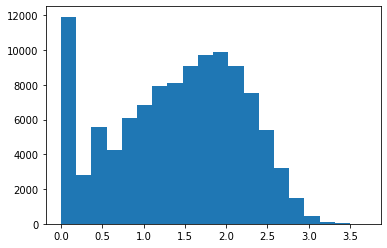

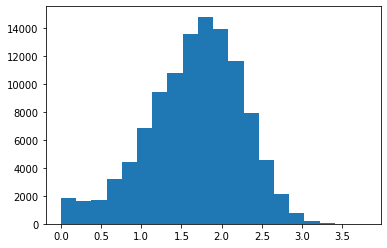

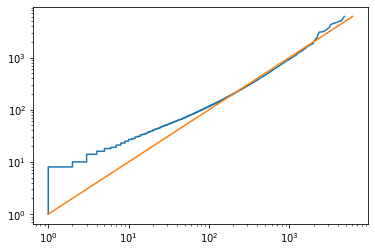

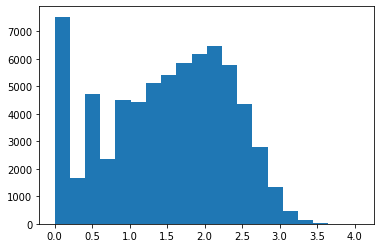

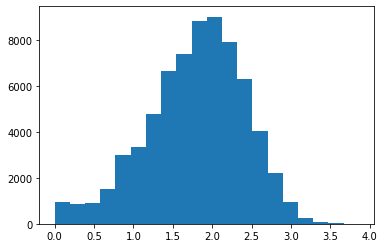

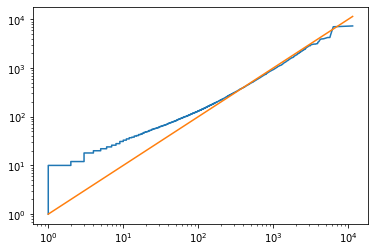

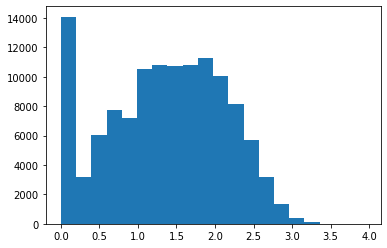

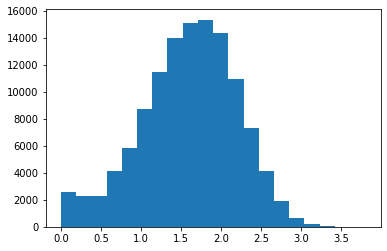

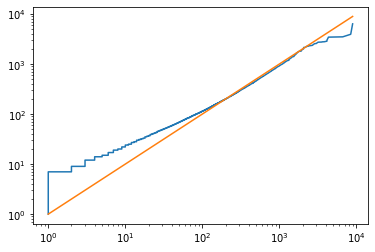

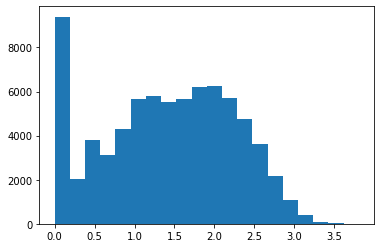

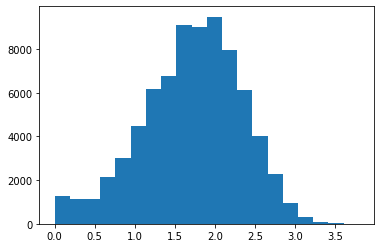

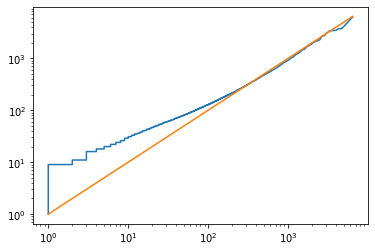

In [4]:
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
orf_crd_dict_oct = read_orf_crd_file("../data/oct_orf_crds.txt")
fastadict_oct = readfasta("../data/orfs_oct_plus.fa")

edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
orf_crd_dict_bim = read_orf_crd_file("../data/bim_orf_crds.txt")
fastadict_bim = readfasta("../data/orfs_bim_plus.fa")

edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
orf_crd_dict_sep = read_orf_crd_file("../data/sep_orf_crds.txt")
fastadict_sep = readfasta("../data/orfs_sep_plus.fa")

edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)
orf_crd_dict_squ = read_orf_crd_file("../data/squ_orf_crds.txt")
fastadict_squ = readfasta("../data/orfs_squ_plus.fa")


#oct
s = build_s_dist(edsites_oct)
build_figure(s, "../article/suppl_figures/An1_distance_dist/oct_real_S_dist.pdf")
rand_s = build_s_dist(build_random_s_dist(fastadict_oct, edsites_oct, orf_crd_dict_oct, syn_nsyn = None))
build_figure(rand_s, "../article/suppl_figures/An1_distance_dist/oct_random_S_dist.pdf")

plt.loglog(sorted(s),sorted(rand_s))
x = np.linspace(1,max(max(s), max(rand_s)))
plt.plot(x,x)
plt.savefig("../article/suppl_figures/An1_distance_dist/oct_S_dist_compar.pdf")
plt.show()

#bim
s = build_s_dist(edsites_bim)
build_figure(s, "../article/suppl_figures/An1_distance_dist/bim_real_S_dist.pdf")
rand_s = build_s_dist(build_random_s_dist(fastadict_bim, edsites_bim, orf_crd_dict_bim, syn_nsyn = None))
build_figure(rand_s, "../article/suppl_figures/An1_distance_dist/bim_random_S_dist.pdf")

plt.loglog(sorted(s),sorted(rand_s))
x = np.linspace(1,max(max(s), max(rand_s)))
plt.plot(x,x)
plt.savefig("../article/suppl_figures/An1_distance_dist/bim_S_dist_compar.pdf")
plt.show()

#sep
s = build_s_dist(edsites_sep)
build_figure(s, "../article/suppl_figures/An1_distance_dist/sep_real_S_dist.pdf")
rand_s = build_s_dist(build_random_s_dist(fastadict_sep, edsites_sep, orf_crd_dict_sep, syn_nsyn = None))
build_figure(rand_s, "../article/suppl_figures/An1_distance_dist/sep_random_S_dist.pdf")

plt.loglog(sorted(s),sorted(rand_s))
x = np.linspace(1,max(max(s), max(rand_s)))
plt.plot(x,x)
plt.savefig("../article/suppl_figures/An1_distance_dist/sep_S_dist_compar.pdf")
plt.show()

#squ
s = build_s_dist(edsites_squ)
build_figure(s, "../article/suppl_figures/An1_distance_dist/squ_real_S_dist.pdf")
rand_s = build_s_dist(build_random_s_dist(fastadict_squ, edsites_squ, orf_crd_dict_squ, syn_nsyn = None))
build_figure(rand_s, "../article/suppl_figures/An1_distance_dist/squ_random_S_dist.pdf")

plt.loglog(sorted(s),sorted(rand_s))
x = np.linspace(1,max(max(s), max(rand_s)))
plt.plot(x,x)
plt.savefig("../article/suppl_figures/An1_distance_dist/squ_S_dist_compar.pdf")
plt.show()